# ITS307 Data Analytics : Autumn Semester 2022
# Practical 10 

# Evaluation metrics

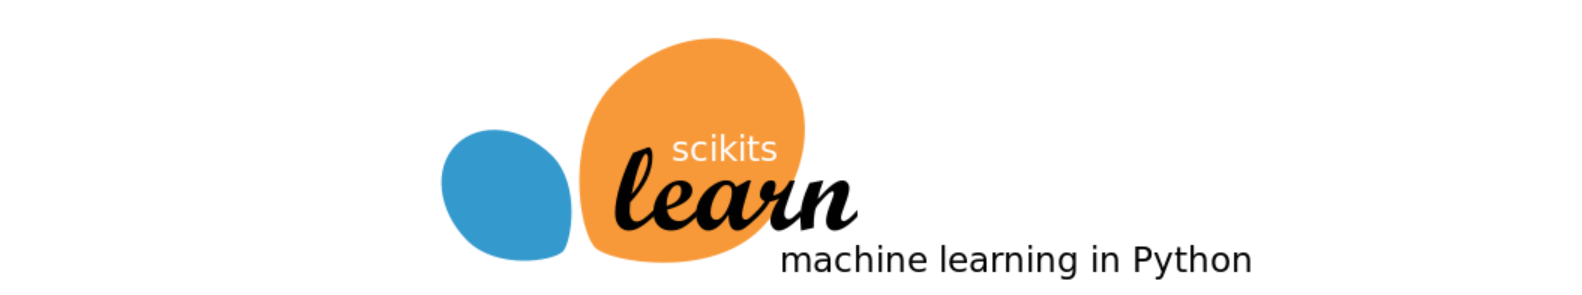

# Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Importing Libraries </li>
<li> Loading and Cleaning with Pandas</li>
<li> Handling Missing values</li>

<li> Scaling Numerical Features  </li>
<li> Encode Categorical Features  </li>
<li> Training Model</li>
<li> Evaluating Model</li>
<li> Making Prediction</li>
</ol>

# 0. Learning Objectives

For this test, we will use the Credit Card Approval dataset from the UCI Machine Learning Repository. Dataset has mixture of both numerical and categorical features with number of missing entries. The features of this dataset have been anonymized to protect the privacy, but some blog gives pretty good overview of the probable features. The probable features in a typical credit card application are `Gender, Age, Debt, Married, BankCustomer, EducationLevel, Ethnicity, YearsEmployed, PriorDefault, Employed, CreditScore, DriversLicense, Citizen, ZipCode, Income` and finally the `ApprovalStatus`. For your understanding map the features descriptions given here with respect to columns in the dataset.

Feature Information:

    A1:	b, a.
    A2:	continuous.
    A3:	continuous.
    A4:	u, y, l, t.
    A5:	g, p, gg.
    A6:	c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
    A7:	v, h, bb, j, n, z, dd, ff, o.
    A8:	continuous.
    A9:	t, f.
    A10:	t, f.
    A11:	continuous.
    A12:	t, f.
    A13:	g, p, s.
    A14:	continuous.
    A15:	continuous.
    A16: +,-         (class attribute)
    
  #### By the end of this lab, you should be able to predict whether an applicant will be getting credit card approval or not.

# 1. Importing Libraries 

Import all the necessary libraries here. If you don't remember all the libraries in this step, you may choose to import when required.

In [1]:
import pandas as pd
import numpy as np


# 2. Loading and Cleaning Data with Pandas


##  2.1.  Load data
- To load data, mention feature names given above in section 1 and display first five and last five records.

In [2]:
df = pd.read_csv('creditcard.txt')
df

,b,30.83,0,u,g,w,v,1.25,t,t.1,01,f,g.1,00202,0.1,+
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,00360,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
685,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
686,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
687,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


In [3]:
df.columns=['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore', 'DriversLicense', 'Citizen', 'ZipCode', 'Income', 'ApprovalStatus']


In [4]:
first_5=df.head()
first_5

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,00360,0,+


In [5]:
last_5 = df.tail(5)
last_5

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
684,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
685,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
686,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
687,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-
688,b,35.00,3.375,u,g,c,h,8.29,f,f,0,t,g,00000,0,-


## 2.2.  Print summary of the dataset

In [6]:
# summary
df.describe()

,Debt,YearsEmployed,CreditScore,Income
count,689.000000,689.000000,689.000000,689.000000
mean,4.765631,2.224819,2.402032,1018.862119
std,4.978470,3.348739,4.866180,5213.743149
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.165000,0.000000,0.000000
50%,2.750000,1.000000,0.000000,5.000000
75%,7.250000,2.625000,3.000000,396.000000
max,28.000000,28.500000,67.000000,100000.000000


## 2.3. Check null values for all the colums in the dataset

In [7]:
df.isna().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
ApprovalStatus    0
dtype: int64

## 2.4. Check datatypes of all the columns

In [8]:
df.dtypes

Gender             object
Age                object
Debt              float64
Married            object
BankCustomer       object
EducationLevel     object
Ethnicity          object
YearsEmployed     float64
PriorDefault       object
Employed           object
CreditScore         int64
DriversLicense     object
Citizen            object
ZipCode            object
Income              int64
ApprovalStatus     object
dtype: object

## 2.5 Cleaning data
- There are some columns which contains value as "?". Replace them with np.nan.

In [9]:
df.replace('?', np.nan, inplace=True)

## 2.6 Type conversion
- Some numerical features are not in expected types. Convert their types.

In [10]:
df['Age']=df['Age'].astype('float64')
df['ZipCode']=df['ZipCode'].astype('float64')

In [11]:
df.dtypes

Gender             object
Age               float64
Debt              float64
Married            object
BankCustomer       object
EducationLevel     object
Ethnicity          object
YearsEmployed     float64
PriorDefault       object
Employed           object
CreditScore         int64
DriversLicense     object
Citizen            object
ZipCode           float64
Income              int64
ApprovalStatus     object
dtype: object

# 3. Handling Missing Values

- Before handling missing value, store all the categorical data in `categorical_features` and numerical data in `numerical features`


- Print missing values of both categorical and numerical features before handling missing values

In [12]:
categorical_features=df.select_dtypes(include=['object', 'bool'])
categorical_features.head()

,Gender,Married,BankCustomer,EducationLevel,Ethnicity,PriorDefault,Employed,DriversLicense,Citizen,ApprovalStatus
0,a,u,g,q,h,t,t,f,g,+
1,a,u,g,q,h,t,f,f,g,+
2,b,u,g,w,v,t,t,t,g,+
3,b,u,g,w,v,t,f,f,s,+
4,b,u,g,m,v,t,f,t,g,+


In [13]:
numerical_features = df.select_dtypes(include=['float64', 'int64'])
numerical_features.head()

,Age,Debt,YearsEmployed,CreditScore,ZipCode,Income
0,58.67,4.460,3.04,6,43.0,560
1,24.50,0.500,1.50,0,280.0,824
2,27.83,1.540,3.75,5,100.0,3
3,20.17,5.625,1.71,0,120.0,0
4,32.08,4.000,2.50,0,360.0,0


In [14]:
# missing values for categorical features
categorical_features.isna().sum()

Gender            12
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
PriorDefault       0
Employed           0
DriversLicense     0
Citizen            0
ApprovalStatus     0
dtype: int64

In [15]:
# missing values for numerical features
numerical_features.isna().sum()

Age              12
Debt              0
YearsEmployed     0
CreditScore       0
ZipCode          13
Income            0
dtype: int64

## 3.1. Handling Missing values for Categorical variable
- Use sklearn SimpleImputer to impute categorical values with most frequest values. 

- Check missing records after imputation

In [16]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')

cat_data=imputer.fit_transform(categorical_features)

new_categorical_features = pd.DataFrame(cat_data, columns=categorical_features.columns)
new_categorical_features.head()

,Gender,Married,BankCustomer,EducationLevel,Ethnicity,PriorDefault,Employed,DriversLicense,Citizen,ApprovalStatus
0,a,u,g,q,h,t,t,f,g,+
1,a,u,g,q,h,t,f,f,g,+
2,b,u,g,w,v,t,t,t,g,+
3,b,u,g,w,v,t,f,f,s,+
4,b,u,g,m,v,t,f,t,g,+


In [17]:
new_categorical_features.isna().sum()

Gender            0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
PriorDefault      0
Employed          0
DriversLicense    0
Citizen           0
ApprovalStatus    0
dtype: int64

## 3.2. Handling Missing values for numerical variable

- Use sklearn SimpleImputer to impute categorical values with most frequest values. 

- Check missing records after imputation

In [18]:
from sklearn.impute import SimpleImputer
impute = SimpleImputer(strategy='most_frequent')

num_data = impute.fit_transform(numerical_features)

new_numerical_features = pd.DataFrame(num_data, columns = numerical_features.columns)
new_categorical_features.head()

,Gender,Married,BankCustomer,EducationLevel,Ethnicity,PriorDefault,Employed,DriversLicense,Citizen,ApprovalStatus
0,a,u,g,q,h,t,t,f,g,+
1,a,u,g,q,h,t,f,f,g,+
2,b,u,g,w,v,t,t,t,g,+
3,b,u,g,w,v,t,f,f,s,+
4,b,u,g,m,v,t,f,t,g,+


In [19]:
new_categorical_features.isna().sum()

Gender            0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
PriorDefault      0
Employed          0
DriversLicense    0
Citizen           0
ApprovalStatus    0
dtype: int64

# 4. Scaling Numerical Features
- Use any scaling techniques to scale all the numerical features

In [20]:
# scaling using standard scaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler_data = scaler.fit_transform(new_numerical_features)

scaler_df=pd.DataFrame(scaler_data, columns=new_numerical_features.columns)
scaler_df.head()

,Age,Debt,YearsEmployed,CreditScore,ZipCode,Income
0,2.288422,-0.061435,0.243606,0.739920,-0.790469,-0.088074
1,-0.580530,-0.857438,-0.216602,-0.493976,0.571847,-0.037402
2,-0.300939,-0.648387,0.455780,0.534270,-0.462824,-0.194985
3,-0.944081,0.172742,-0.153847,-0.493976,-0.347860,-0.195561
4,0.055896,-0.153900,0.082234,-0.493976,1.031701,-0.195561


In [21]:
new_categorical_features.columns

Index(['Gender', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity',
       'PriorDefault', 'Employed', 'DriversLicense', 'Citizen',
       'ApprovalStatus'],
      dtype='object')

# 5. Encode Categorical data
- Since we are not aware of the type of categorical data, lets encode all features using OrdinalEncoder. If you are familiar with other encoding techniques, you may use them too.


- Use LabelEncoder to encode Target variable and store in variable `y`


- Concatenate Categorical and Numerical features together in single dataframe `X`


In [22]:
# all features

from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

oe_data=oe.fit_transform(new_categorical_features[['Gender', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity',
       'PriorDefault', 'Employed', 'DriversLicense', 'Citizen']])

oe_df = pd.DataFrame(oe_data, columns = [['Gender', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity',
       'PriorDefault', 'Employed', 'DriversLicense', 'Citizen']])
oe_df.head()


,Gender,Married,BankCustomer,EducationLevel,Ethnicity,PriorDefault,Employed,DriversLicense,Citizen
0,0.0,1.0,0.0,10.0,3.0,1.0,1.0,0.0,0.0
1,0.0,1.0,0.0,10.0,3.0,1.0,0.0,0.0,0.0
2,1.0,1.0,0.0,12.0,7.0,1.0,1.0,1.0,0.0
3,1.0,1.0,0.0,12.0,7.0,1.0,0.0,0.0,2.0
4,1.0,1.0,0.0,9.0,7.0,1.0,0.0,1.0,0.0


In [24]:
# for target featues

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le_data = le.fit_transform(new_categorical_features['ApprovalStatus'])

le_df=pd.DataFrame(le_data, columns = ['ApprovalStatus'] )
le_df.head()

,ApprovalStatus
0,0
1,0
2,0
3,0
4,0


In [25]:
# concat

x_df = pd.concat([oe_df, le_df,scaler_df], axis=1)
x_df.head()

,"(Gender,)","(Married,)","(BankCustomer,)","(EducationLevel,)","(Ethnicity,)","(PriorDefault,)","(Employed,)","(DriversLicense,)","(Citizen,)",ApprovalStatus,Age,Debt,YearsEmployed,CreditScore,ZipCode,Income
0,0.0,1.0,0.0,10.0,3.0,1.0,1.0,0.0,0.0,0,2.288422,-0.061435,0.243606,0.739920,-0.790469,-0.088074
1,0.0,1.0,0.0,10.0,3.0,1.0,0.0,0.0,0.0,0,-0.580530,-0.857438,-0.216602,-0.493976,0.571847,-0.037402
2,1.0,1.0,0.0,12.0,7.0,1.0,1.0,1.0,0.0,0,-0.300939,-0.648387,0.455780,0.534270,-0.462824,-0.194985
3,1.0,1.0,0.0,12.0,7.0,1.0,0.0,0.0,2.0,0,-0.944081,0.172742,-0.153847,-0.493976,-0.347860,-0.195561
4,1.0,1.0,0.0,9.0,7.0,1.0,0.0,1.0,0.0,0,0.055896,-0.153900,0.082234,-0.493976,1.031701,-0.195561


# 6. Training Model

## 6.1. Train test split
- Before training the model, split your data to train and test set. Keep your test size as 20%, and random_state value as 5. Also make sure that your test data contain equal number of data from both the clases.

In [26]:
from sklearn.model_selection import train_test_split



x= x_df.drop(['ApprovalStatus'], axis=1)
y=x_df.ApprovalStatus

x_train,x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=5, shuffle=True, stratify=x_df.ApprovalStatus)
x_train,x_test, y_train, y_test

(     (Gender,)  (Married,)  (BankCustomer,)  (EducationLevel,)  (Ethnicity,)  \
 48         1.0         1.0              0.0                1.0           7.0   
 678        0.0         1.0              0.0                1.0           7.0   
 584        1.0         1.0              0.0                5.0           2.0   
 54         1.0         2.0              2.0               12.0           7.0   
 312        0.0         1.0              0.0                3.0           7.0   
 ..         ...         ...              ...                ...           ...   
 647        1.0         1.0              0.0                8.0           3.0   
 146        0.0         2.0              2.0               10.0           3.0   
 648        0.0         1.0              0.0                5.0           2.0   
 534        0.0         2.0              2.0                5.0           2.0   
 591        1.0         1.0              0.0                1.0           7.0   
 
      (PriorDefault,)  (Em

## 6.2 Train the model
- Use any three different algorithm to train your model. Make sure you specify the right parameters for each one of them.

In [27]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

C:\Users\Tashi Penjor\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


LogisticRegression()

In [28]:
y_pred=model.predict(x_test)
y_pred

C:\Users\Tashi Penjor\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


array([1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0])

# 7. Evaluating the model

- Use score method to check accuracy of all the models


- Build confusion matrix for all the model and visualize using heatmap.


- Find Precision, Recall and F1-score

In [29]:
from sklearn.metrics import accuracy_score


In [30]:
model.score(x_train,y_train)

C:\Users\Tashi Penjor\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


0.8656987295825771

In [31]:
model.score(x_test,y_test)

C:\Users\Tashi Penjor\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


0.8623188405797102

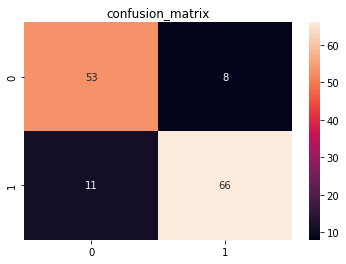

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True)
plt.title('confusion_matrix')
plt.show()

In [33]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average=None)


array([0.828125  , 0.89189189])

In [34]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average=None)

array([0.86885246, 0.85714286])

In [35]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average=None)

array([0.848     , 0.87417219])

# 8. Making Prediction
- Take any sample record from your training data and make prediction.

In [36]:
model.predict([[1.0,1.0,0.0,12.0,7.0,1.0,1.0,0.0,0.0,0.256842,0.000000,0.043860,0.014925,0.1010,0.00000]])

array([0])

0

# 9. Improve your model

- Use any technique to improve your model.

In [37]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
fs=SelectKBest(score_func=f_classif,k=4)
x_select=fs.fit_transform(x_df,x_df.ApprovalStatus)
x_select.shape

C:\Users\Tashi Penjor\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Tashi Penjor\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\Tashi Penjor\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


(689, 4)

In [38]:
a=x_select
b=x_df.ApprovalStatus
X_train,X_test,Y_train,Y_test=train_test_split(a,b,test_size=0.2,random_state=5,stratify=x_df.ApprovalStatus)

In [39]:
lr=LogisticRegression()
lr.fit(X_train,Y_train)

LogisticRegression()

In [40]:
y_pred1=lr.predict(X_test)
y_pred1

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0])

In [41]:
lr.score(X_test,Y_test)

1.0

In [42]:
lr.score(X_train, Y_train)

1.0

In [43]:
precision_score(Y_test,y_pred1,average=None)

array([1., 1.])

In [124]:
recall_score(Y_test,y_pred1,average=None)

array([1., 1.])

In [44]:
from sklearn.metrics import f1_score
f1_score(Y_test,y_pred1,average=None)

array([1., 1.])

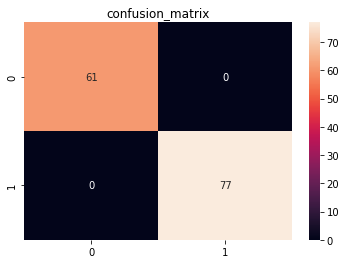

In [45]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(Y_test,y_pred1)
sns.heatmap(cm1, annot=True)
plt.title('confusion_matrix')
plt.show()